# Intro to SciKit-Learn

## Imports
Import all the things we need for this notebook

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

from functions.plotting import plot_decision_regions

from classifiers.logistics_regression import LogisticRegressionGD

The SciKit Learn module includes a bunch of datasets. This includes the Iris dataset. We can go ahead and seperate out all the nessecary parts in order to get things moving forward.

In [3]:
iris = datasets.load_iris()
features = iris.data[:, [2,3]]
labels = iris.target
print('Class labels:', np.unique(labels))

Class labels: [0 1 2]


One important thing to do with your data set is to seperate it into a training set and a testing set. This basically means that

In [4]:
feature_train, feature_test, label_train, label_test = train_test_split(
    features, labels, test_size=0.3, random_state=1, stratify=labels)

In [5]:
print('Count of each label:', np.bincount(labels))
print('Label counts in training set:', np.bincount(label_train))
print('Label counts in testing set:', np.bincount(label_test))

Count of each label: [50 50 50]
Label counts in training set: [35 35 35]
Label counts in testing set: [15 15 15]


Below we will standardize the dataset using the preprocessing tool `StandardScalar`

In [6]:
sc = StandardScaler()
sc.fit(feature_train)
feature_train_std = sc.transform(feature_train)
feature_test_std = sc.transform(feature_test)

## Perceptron Model
We train the model using the perceptron classifier from scikit learn

In [7]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(feature_train_std, label_train)

Perceptron(eta0=0.1, random_state=1)

We can now predict on the test set to make sure that out model looks good.


In [8]:
label_prediction = ppn.predict(feature_test_std)
print(f'Misclasified examples: {(label_prediction != label_test).sum()}')
print(f'Error: {(label_prediction != label_test).sum()/len(label_test):.4f}')
print(f'Accuracy (metrics): \t{accuracy_score(label_test, label_prediction):.4f}')
print(f'Accuracy (perceptron): \t{ppn.score(feature_test_std, label_test):.4f}')

Misclasified examples: 1
Error: 0.0222
Accuracy (metrics): 	0.9778
Accuracy (perceptron): 	0.9778


We can now plot a graph to show the regions that each label corresponds to. This will also mark the items that were part of the test set. This should allow us to visually note which ones are in the correct region and which ones are not.


/Users/twhitaker/PycharmProjects/machine-learning-book/functions/plotting.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


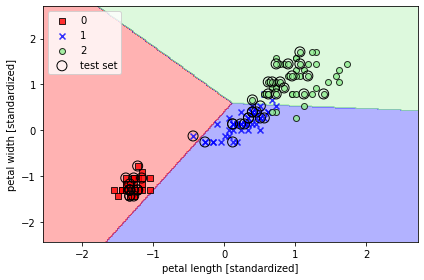

In [9]:
features_combined_std = np.vstack((feature_train_std, feature_test_std))
label_combined = np.hstack((label_train, label_test))
plot_decision_regions(X=features_combined_std,
                      y=label_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic Regression
A logical regression is a classification method that tries to calculate the classification. The first thing talked about is the probability of the positive outcome. The second idea talkeda bout is to calculate the value of the logit function at the probability that something is classified as the positive outcome. This looks like the following

The odds of an event are written as

$$ \frac{p}{1-p}$$

We then define the logit funciton as

$$ logit(p) = \log\frac{p}{1-p} $$

We can then use what we have learnd about the weights of the features to write

$$ logit(p(y = 1|\vec{x}) = \sum^m_{i=0} w_i x_i = \vec{w}\cdot\vec{x} $$

where we are letting $p(y=1|\vec x)$ represent the probability that the data point is classified under the positive outcome given the values of the features $\vec x$.

The thing that we actually want is the probability funciton, which can be found throughthe **logistic sigmnoid function** or **sigmoid function**.

$$ \phi(z) = \frac1{1+e^{-z}} $$

where $z$ is the net input, or the linear combination of weights in inputs:

$$ z = \vec{w}\cdot\vec{x} = w_0x_0 + w_1x_1 + \dots w_mx_m$$


## Doing the thing here
I don't know why we are doing the thing now in this file, but I don't quite care enough to make it go somewhere else.

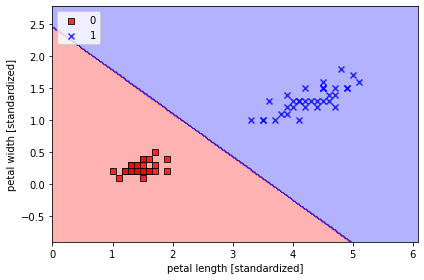

In [10]:
feature_train_01_subset = feature_train[(label_train == 0) | (label_train == 1)]
label_train_01_subset = label_train[(label_train == 0) | (label_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(feature_train_01_subset, label_train_01_subset)

plot_decision_regions(X=feature_train_01_subset,
                      y=label_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Now we do it with SciKit-Learn


In [11]:
from sklearn.linear_model import LogisticRegression

/Users/twhitaker/PycharmProjects/machine-learning-book/functions/plotting.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


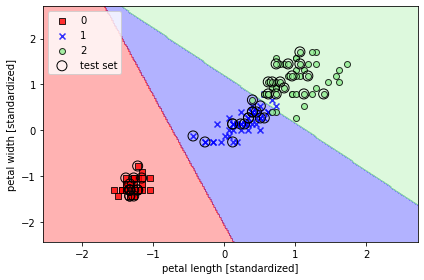

In [12]:
lr = LogisticRegression(C=100.0, random_state=1,
                        solver='lbfgs', multi_class='ovr')
lr.fit(feature_train_std, label_train)

plot_decision_regions(features_combined_std,
                      label_combined,
                      classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
print(
    "prediction propabilities on 3 different examples: \n",
    lr.predict_proba(feature_test_std[:3, :]),
    "\nPredicting the class on those same 3 examples: \n",
    lr.predict_proba(feature_test_std[:3, :]).argmax(axis=1)
)

prediction propabilities on 3 different examples: 
 [[3.81527885e-09 1.44792866e-01 8.55207131e-01]
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]] 
Predicting the class on those same 3 examples: 
 [2 0 0]


The above would basically suggest that the first example was class label 2 (Iris-virginica), and the second two would be class label 0 (Iris-setosa). Alternatively, we can let SciKit-Learn do this part for us.

In [14]:
print("predicting the labels on 3 examples:", lr.predict(feature_test_std[:3, :]))

predicting the labels on 3 examples: [2 0 0]


Let's also check out this `C` variable which is designed to help avoid under and overfitting by forcing extra rules on the weights as they are being calculated. This value C is inversly corrolated wih the **reregularization strenght**


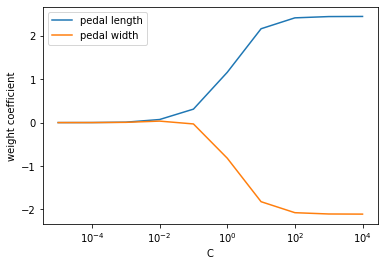

In [15]:
weights, params = [], []

for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c,
                            random_state=1,
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(feature_train_std, label_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='pedal length')
plt.plot(params, weights[:, 1], label='pedal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend()
plt.xscale('log')
plt.show()

# Support Vector Machines
Support Veector machines are a classification method where we try to draw a line that divides two regions by the largest margin possible. The simplified mathematics behind this goes as follows:

We start off with a statement, calculating the label of two given points.

$$ w_0 + \boldsymbol{w}^T\boldsymbol{x}_{pos} = 1 \\ w_0 + \boldsymbol{w}^T\boldsymbol{x}_{pos} = -1 $$

Technically, these two equations can describe hiperplanes that are parallel to the decision boundary. We want the distance between these two hyperplanes to be as large as possible. To accomplish this, we combine the two by subtracting the latter from the former to create

$$ w_0 + \boldsymbol w^T \boldsymbol x_{pos} - w_o - \boldsymbol w^T \boldsymbol x_{neg} = \boldsymbol w^T(\boldsymbol x_{pos} - \boldsymbol x_{neg}) = 2 $$

To normalize this equation, we divide both sides by the by the $l_2$ norm

$$ ||\boldsymbol w|| = \sqrt{\sum_{j=1}^m w^2_j } $$

to get

$$ \frac{\boldsymbol w^T(\boldsymbol x_{pos} - \boldsymbol x_{neg})}{||\boldsymbol w ||} = \frac2{||\boldsymbol w ||} $$

We can now use a variety of methods to maximize the value on the RHS of the above equation to maximize the distance between the two hyperplanes mentioned above under the constraint that we still classify everything correctly which can be most consisly expressed as

$$ y^{(i)} (w_0 + \boldsymbol w^T \boldsymbol x^{(i)} ) \ge 1 \space\space \forall_i $$

which basically says that the "label" on each point should match the sign of each classification value.

## Non-linearly seperable cases
In non-linearly seperable datasets, we can introduce (what I am going to call) a fudge factor to the constraints. If we seperate out the consiscely written version above, we can write this fudge factor into our conditions as

$$ w_0 + \boldsymbol w^T \boldsymbol x^{(i)} \ge 1 - \xi^{(i)} \text{ if } y^{(i)} = 1 \\ w_0 + \boldsymbol w^T \boldsymbol x^{(i)} \le -1 + \xi^{(i)} \text{ if } y^{(i)} = -1  $$

for $i = 1\dots N$. This fudge factor introduces itself into the maximization term (which we have actually turned into a minimization) as

$$ \frac12 ||\boldsymbol w ||^2 + C \left(\sum_i\xi^{(i)}\right)$$

Here, $C$ can be treated as a hyperparameter to adjust how much tolerance we will allow in misclassification.

Now, to actually do it.

/Users/twhitaker/PycharmProjects/machine-learning-book/functions/plotting.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


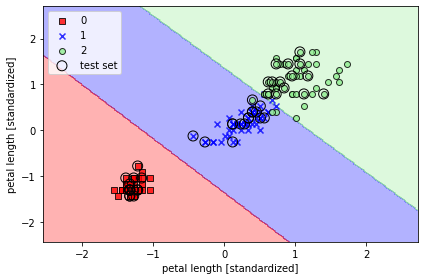

In [16]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(feature_train_std, label_train)

plot_decision_regions(features_combined_std,
                      label_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Support Vector Machines allows for kernelization. Basically this means that we can rewrite or transform the data that can be separated and classified more clearly or easily.

Here we are using a constructed data set to showcase what this process would look like. The following plot shows the data and the labels attached to it.

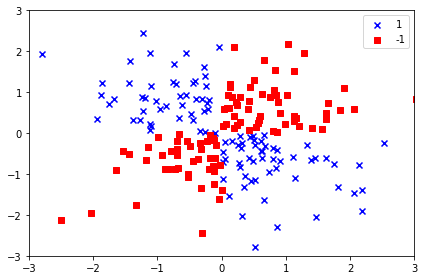

In [21]:
np.random.seed(1)

x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0,
                       x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(x_xor[y_xor == 1, 0],
            x_xor[y_xor == 1, 1],
            c='b',
            marker='x',
            label='1')
plt.scatter(x_xor[y_xor == -1, 0],
            x_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

One example of a kernal function includes the **radial basis function (RBF)** (also called the **Gaussian kernel**).

$$ \begin{align} \kappa \left ( \vec x^{(i)}, \vec x^{(j)} \right )  &= \exp \left ( - \frac{||\vec x^{(i)} - \vec x^{(j)} ||^2 }{2\sigma^2} \right ) \\ &= \exp \left ( - \gamma ||\vec x^{(i)} - \vec x^{(j)} ||^2  \right )\end{align}$$

where we let $\gamma = 1 / 2\sigma^2$. This funciton can can be seen as a similarity function where we can quantify how similar or physically close two data points are. The inverted exponential means that 0 means the data points are infinitely dissimilar and a 1 means they are exactly the same.

Now to build the model.

/Users/twhitaker/PycharmProjects/machine-learning-book/functions/plotting.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


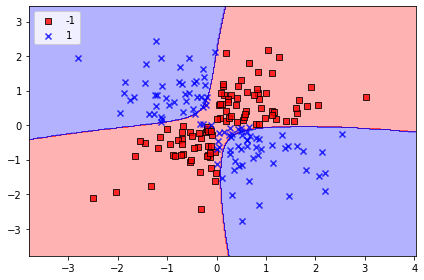

In [32]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Let's give this a shot on the iris dataset. Here we want to observe the effect the parameter $\gamma$ has on the equation. The folloiwng two plots have $\gamma$ set to $0.2$ and $100$ respectively.

/Users/twhitaker/PycharmProjects/machine-learning-book/functions/plotting.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


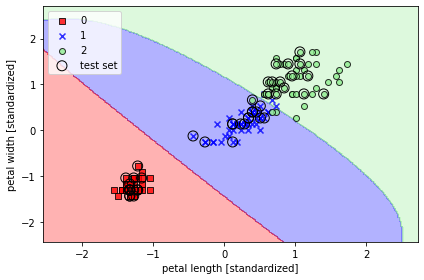

In [36]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(feature_train_std, label_train)
plot_decision_regions(features_combined_std,
                      label_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/Users/twhitaker/PycharmProjects/machine-learning-book/functions/plotting.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


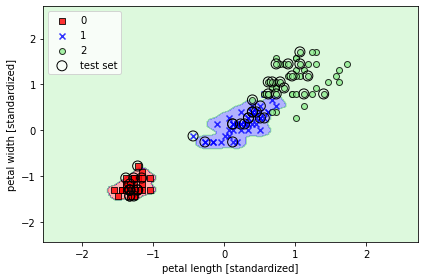

In [40]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(feature_train_std, label_train)
plot_decision_regions(features_combined_std,
                      label_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree Learning
Start here with decision trees. 